In [ ]:
import gensim 
from gensim.models import Word2Vec 
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import  sent_tokenize,word_tokenize,RegexpTokenizer
import nltk as nltk
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
from gensim.sklearn_api import W2VTransformer

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import LeakyReLU

Using TensorFlow backend.


(a)
i . Fetching 20-newsgroup data

In [ ]:
newsgroup = fetch_20newsgroups(subset = 'all')

ii. Pre-processing the data.Converting  to  lowercase,  removing  punctuations,  symbols,  and  stop-words using ntlk.

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
clean_sentences=[]
for text in newsgroup.data:
  tokens = [word.lower() for word in word_tokenize(text) if word not in stop_words and word.isalpha()]
  clean_sentences.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


iii. Convert the words in the dataset to vectors of dimension 100 using Word2Vec.

In [ ]:
#skipgram model
model1 = gensim.models.Word2Vec(clean_sentences, min_count = 10, size = 100, window = 5, sg = 1)
#bag of words model
model2 = gensim.models.Word2Vec(clean_sentences, min_count = 10, size = 100, window = 5, sg = 0)

iv. Vocabulary size

In [ ]:
#skipgram model
vocabulary = list(model1.wv.vocab)
print(len(vocabulary))

#bag of words model
vocabulary = list(model2.wv.vocab)
print(len(vocabulary))

21153
21153


v. most similar words in the corpus to the word “car” along with their similarities.

In [ ]:
#skipgram model
similar_words = model1.wv.most_similar('car',topn=20)	
print(similar_words)

#bag of words model
similar_words = model2.wv.most_similar('car',topn=20)	
print(similar_words)

[('dealership', 0.7718571424484253), ('svx', 0.7624938488006592), ('sentra', 0.7590857148170471), ('tires', 0.7572559118270874), ('tranny', 0.7411032319068909), ('civic', 0.7385892271995544), ('nissan', 0.7381948828697205), ('toyota', 0.7307044863700867), ('celica', 0.7285230159759521), ('audi', 0.7253418564796448), ('volvo', 0.7231577634811401), ('mercedes', 0.72249436378479), ('saab', 0.7198851704597473), ('bumper', 0.7173764705657959), ('bicycle', 0.7164487838745117), ('auto', 0.7157862186431885), ('awd', 0.714452862739563), ('honda', 0.7125303745269775), ('camry', 0.7124624252319336), ('brakes', 0.7122894525527954)]
[('auto', 0.8084830641746521), ('bike', 0.803674042224884), ('dealer', 0.8012408018112183), ('tires', 0.7876162528991699), ('ford', 0.7832679748535156), ('bikes', 0.7778597474098206), ('motorcycle', 0.7698036432266235), ('cars', 0.7664900422096252), ('owner', 0.7663800120353699), ('dealership', 0.7566642761230469), ('toyota', 0.7550986409187317), ('sho', 0.7443501353263

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


vi. top 5 words similar to the following operations: 


*   girl + father - boy
*   sports - bat + ball



In [ ]:
print("skipgram model")
result = model1.wv.most_similar(positive=['girl', 'father'], negative=['boy'])
print(result)
result = model1.wv.most_similar(positive=['sports', 'ball'], negative=['bat'])
print(result)

print("bag of words model")
result = model2.wv.most_similar(positive=['girl', 'father'], negative=['boy'])
print(result)
result = model2.wv.most_similar(positive=['sports', 'ball'], negative=['bat'])
print(result)

skipgram model
[('elohim', 0.6382328271865845), ('grandmother', 0.6359462738037109), ('heel', 0.6350694894790649), ('husband', 0.6334046721458435), ('hid', 0.6298131942749023), ('hath', 0.6296772360801697), ('sisters', 0.6282151937484741), ('hast', 0.6275357007980347), ('son', 0.6182082295417786), ('blessed', 0.6181209087371826)]
[('camping', 0.5577608346939087), ('golf', 0.556727409362793), ('wfan', 0.5511124134063721), ('racing', 0.5434216260910034), ('televised', 0.5361587405204773), ('sprint', 0.5350703001022339), ('wagons', 0.5322356224060059), ('tuesday', 0.528497576713562), ('tonight', 0.5280579924583435), ('wdve', 0.524966299533844)]
bag of words model
[('son', 0.8735509514808655), ('jehovah', 0.8561493754386902), ('mother', 0.8403535485267639), ('woman', 0.837236225605011), ('moses', 0.8301287293434143), ('spirit', 0.8244327902793884), ('elohim', 0.8158077597618103), ('tomb', 0.8146034479141235), ('cast', 0.8127602338790894), ('holy', 0.8077899217605591)]
[('weekend', 0.774874

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


vii. Creating a TSNE plot for the top 20 words similar to each of the words [‘baseball’, ‘software’,‘police’, ‘government’, ‘circuit’, ‘car’]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


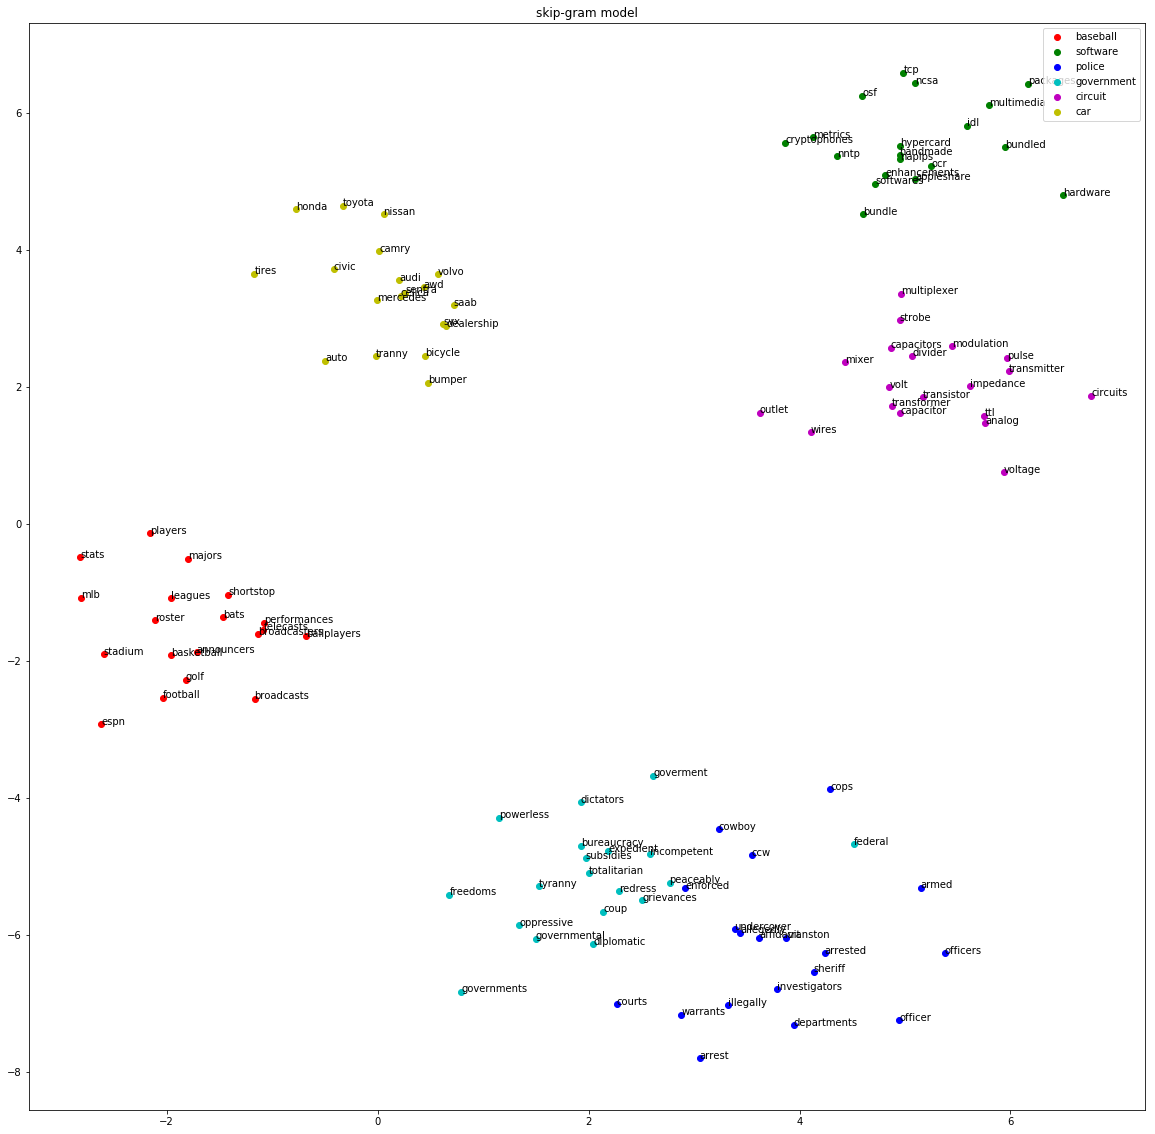

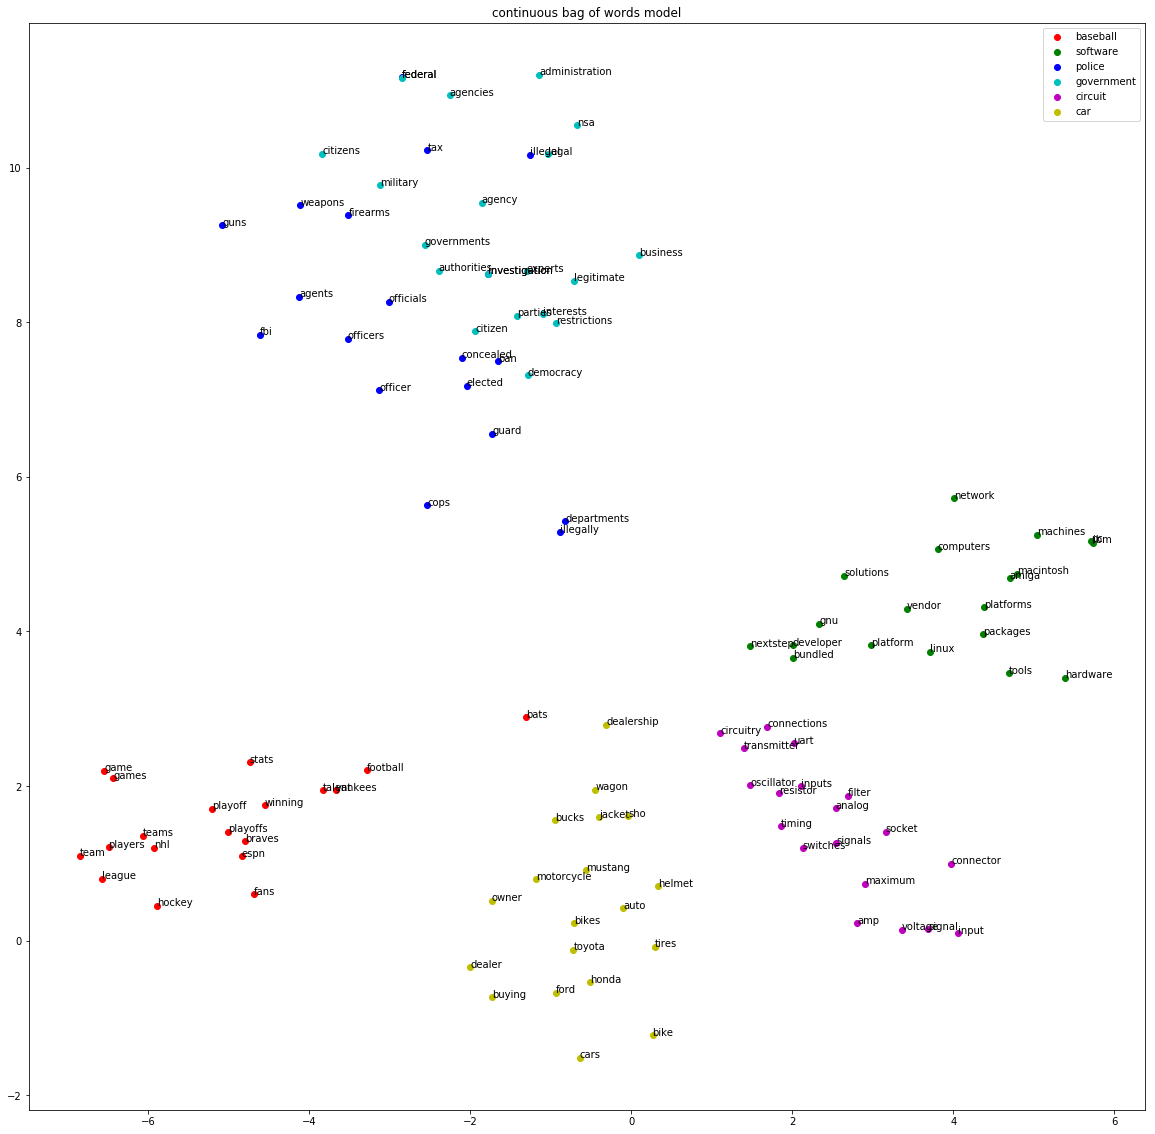

In [ ]:
plt_word=['baseball','software','police', 'government', 'circuit', 'car']
X1 = np.zeros((120,100))
X2= np.zeros((120,100))
i=0
similar1 = []
similar2 =[]
for word in plt_word:
  similar_words1 =  model1.wv.most_similar(word,topn=20)
  similar_words2 = model2.wv.most_similar(word,topn=20)
  similar1.append(similar_words1)
  similar2.append(similar_words2)
  for (sim_word1,sim_word2) in zip(similar_words1,similar_words2):
    X1[i]=model1[sim_word1[0]]
    X2[i]=model2[sim_word2[0]]
    i=i+1	
    
tsne = TSNE(n_components=2, random_state=0)
X1_2d = tsne.fit_transform(X1)
tsne = TSNE(n_components=2, random_state=0)
X2_2d = tsne.fit_transform(X2)


colors = ['r', 'g', 'b', 'c', 'm', 'y']
labels=['baseball','software','police', 'government', 'circuit', 'car']

#skip_gram model
plt.figure(figsize=(20,20))
plt.title("skip-gram model")
for i in range(0,6):
  c =colors[i]
  x= X1_2d[20*i:20*(i+1)-1,0]
  y= X1_2d[20*i:20*(i+1)-1,1]
  ann = similar1[i]
  for m in range(0,len(x)):
    plt.annotate(similar1[i][m][0],xy=(x[m],y[m]))
  plt.scatter(x,y,c=c,label=labels[i])
plt.legend()

#bag of words model

plt.figure(figsize=(20,20))
plt.title("continuous bag of words model")
for i in range(0,6):
  c =colors[i]
  x= X2_2d[20*i:20*(i+1)-1,0]
  y= X2_2d[20*i:20*(i+1)-1,1]
  ann = similar2[i]
  for m in range(0,len(x)):
    plt.annotate(similar2[i][m][0],xy=(x[m],y[m]))
  plt.scatter(x,y,c=c,label=labels[i])
plt.legend()

viii. methodology to represent each document as a vector using the word vectors.

In [ ]:
#Taken from a conference paper at ICLR 2017 by Minmin Chen.
"""Doc2VecC enforces a meaningful document representation can be formed by averaging the word embeddings during learning. 
Furthermore, we include a corruption model that randomly remove words from a document during learning, a mechanism that 
is critical to the performance and learning speed of our algorithm."""

"""Similar to Word2Vec or Paragraph Vectors, Doc2VecC consists of an input layer, a projection layeras well as an output layer to predict the 
target word. The embeddings of neighboring words provide local context while the vector 
representation ofthe entire document serves as the global context.  In contrast to Paragraph Vectors,which directly learns a 
unique vector for each document, Doc2VecC represents each document as an average of the embeddings of words randomly sampled from the 
document."""

'Similar to Word2Vec or Paragraph Vectors, Doc2VecC consists of an input layer, a projection layeras well as an output layer to predict the \ntarget word. The embeddings of neighboring words provide local context while the vector \nrepresentation ofthe entire document serves as the global context.  In contrast to Paragraph Vectors,which directly learns a \nunique vector for each document, Doc2VecC represents each document as an average of the embeddings of words randomly sampled from the \ndocument.'

(b) i. Training the skip gram model and the bag of words model with 70% training 10% validation and 20% testing

In [ ]:
newsgroup_train = fetch_20newsgroups(subset = 'train')
newsgroup_train = fetch_20newsgroups(subset = 'test')
vect_data1 = np.zeros((len(clean_sentences),100))
vect_data2 = np.zeros((len(clean_sentences),100))

i=0
for li in clean_sentences:
  x1=np.zeros((100))
  x2 =np.zeros((100))
  j=0 
  k=0
  for word in li:
    if word in model1.wv:
      x1=x1+model1.wv[word]
      j=j+1 
    if word in model2.wv:
      x2 = x2 +model2.wv[word]
      k=k+1
  vect_data1[i] = x1/j
  vect_data2[i]= x2/k
  i=i+1

#skip-gram model
model3 = keras.Sequential()
model3.add(keras.layers.Flatten(input_shape=(100,)))
model3.add(keras.layers.Dense(200,activation=LeakyReLU(alpha=0.1)))
model3.add(keras.layers.Dense(200,activation=LeakyReLU(alpha=0.1)))
model3.add(keras.layers.Dense(20,activation='softmax'))
model3.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

vect_data1_norm = keras.utils.normalize(vect_data1)
x_test = vect_data1_norm[:int(0.2*len(vect_data1))]
y_test = newsgroup.target[:int(0.2*len(vect_data1))]
x_train = vect_data1_norm[int(0.2*len(vect_data1)):]
y_train = newsgroup.target[int(0.2*len(vect_data1)):]

trained_model1 = model3.fit(x_train,y_train,epochs=50,shuffle=True,validation_split=0.1,batch_size=10)
test_accuracy1 = model3.evaluate(x_test,y_test)


#bag of words model
model4 = keras.Sequential()
model4.add(keras.layers.Flatten(input_shape=(100,)))
model4.add(keras.layers.Dense(200,activation=LeakyReLU(alpha=0.1)))
model4.add(keras.layers.Dense(200,activation=LeakyReLU(alpha=0.1)))
model4.add(keras.layers.Dense(20,activation='softmax'))
model4.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

vect_data2_norm = keras.utils.normalize(vect_data2)
x_test = vect_data2_norm[:int(0.2*len(vect_data2))]
y_test = newsgroup.target[:int(0.2*len(vect_data2))]
x_train = vect_data2_norm[int(0.2*len(vect_data2)):]
y_train = newsgroup.target[int(0.2*len(vect_data2)):]

trained_model2 = model4.fit(x_train,y_train,epochs=50,shuffle=True,validation_split=0.1,batch_size=10)
test_accuracy2 = model4.evaluate(x_test,y_test)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 13569 samples, validate on 1508 samples
Epoch 1/50
13569/13569 [==============================] - 5s 350us/sample - loss: 1.1934 - acc: 0.6029 - val_loss: 0.7938 - val_acc: 0.7301
Epoch 2/50
13569/13569 [==============================] - 4s 302us/sample - loss: 0.7603 - acc: 0.7414 - val_loss: 0.7024 - val_acc: 0.7646
Epoch 3/50
13569/13569 [==============================] - 4s 297us/sample - loss: 0.6869 - acc: 0.7698 - val_loss: 0.6376 - val_acc: 0.7878
Epoch 4/50
13569/13569 [==============================] - 4s 299us/sample - loss: 0.6443 - acc: 0.7842 - val_loss: 0.6039 - val_acc: 0.7997
Epoch 5/50
13569/13569 [==============================] - 4s 294us/sample - loss: 0.6147 - acc: 0.7946 - val_loss: 0.5870 - val_acc: 0.7924
Epoch 6/50
13569/13569 [==============================] - 4s 294us/sample - loss: 0.5887 - acc: 0.8027 - val_loss: 0.5899 - val_acc: 0.8050
Epoch 7/50
13569/13569 [=====

ii. loss vs iteration curve
    , classiﬁcation error vs iteration curve, classiﬁcation accuracy vs iteration curve

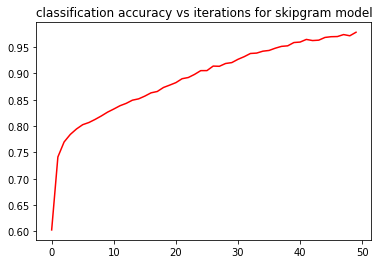

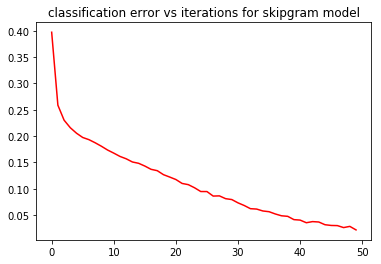

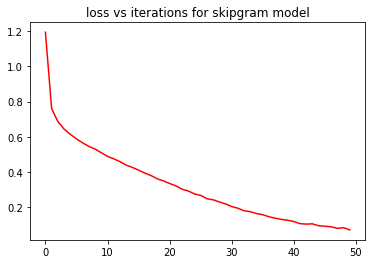

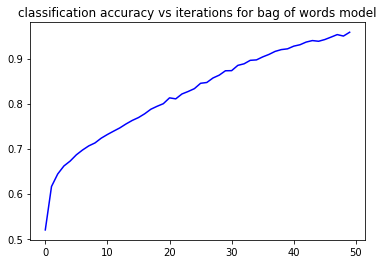

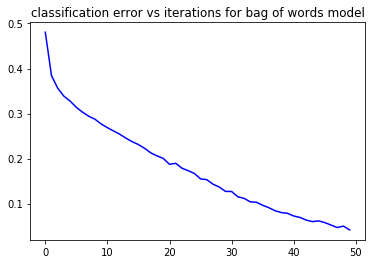

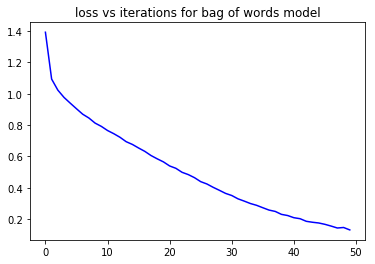

In [ ]:
plt.figure(1)
plt.title('classification accuracy vs iterations for skipgram model')
plt.plot(trained_model1.history['acc'],'r')

plt.figure(2)
plt.title('classification error vs iterations for skipgram model')
plt.plot(1-np.array(trained_model1.history['acc']),'r')

plt.figure(3)
plt.title('loss vs iterations for skipgram model')
plt.plot(trained_model1.history['loss'],'r')


plt.figure(4)
plt.title('classification accuracy vs iterations for bag of words model')
plt.plot(trained_model2.history['acc'],'b')

plt.figure(5)
plt.title('classification error vs iterations for bag of words model')
plt.plot(1-np.array(trained_model2.history['acc']),'b')

plt.figure(6)
plt.title('loss vs iterations for bag of words model')
plt.plot(trained_model2.history['loss'],'b')

iii.  classiﬁcation accuracy, for both training and test data. 

In [ ]:
print("for skip gram model")
print('training data:')
print("classification accuracy:",trained_model1.history['acc'][-1])

print('testing data:')
print('clssification accuracy:',test_accuracy1[1])


print("\nfor bag of words model")
print('training data:')
print("classification accuracy:",trained_model2.history['acc'][-1])

print('testing data:')
print('clssification accuracy:',test_accuracy2[1])

for skip gram model
training data:
classification accuracy: 0.9781856
testing data:
clssification accuracy: 0.8126824

for bag of words model
training data:
classification accuracy: 0.95836097
testing data:
clssification accuracy: 0.66012204


iv. Among skipgram and bag of words model the skip-gram model is performing very better for this data-set